In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
x = df.iloc[:,0:13].values
y = df.iloc[:,13].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .80,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [8]:
ypred = classifier.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=ypred,y_true=y_test)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


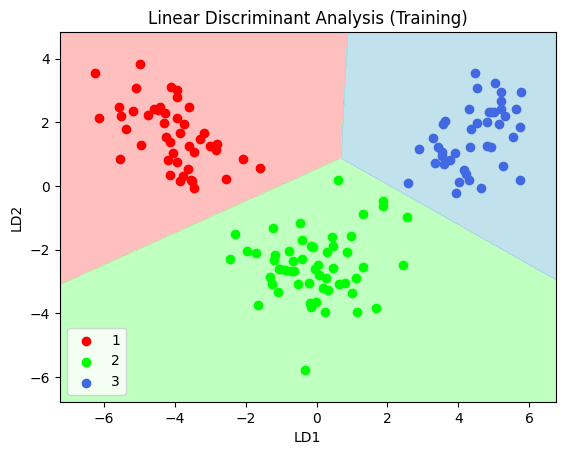

In [11]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
# Create color maps
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA','#ADD8E6'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00','#4169E1'])
# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
# Set the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
# Add title and labels
plt.title('Linear Discriminant Analysis (Training)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
# Show the plot
plt.show()

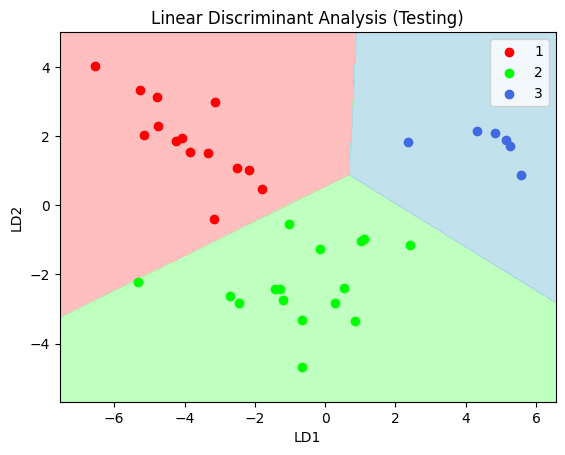

In [12]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
# Create color maps
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA','#ADD8E6'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00','#4169E1'])
# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
# Set the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
# Add title and labels
plt.title('Linear Discriminant Analysis (Testing)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
# Show the plot
plt.show()